# Análisis y Tratamiento de los Datos

In [0]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Cargamos el DataSet
data = pd.read_csv("CreditCardData.csv", skiprows = 1)


In [4]:
#Vista previa de la información contenida en el DataSet.
data.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [5]:
#Estructura de las columnas que tiene el DataSet.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10977 entries, 0 to 10976
Data columns (total 25 columns):
ID                            10977 non-null int64
LIMIT_BAL                     10977 non-null int64
SEX                           10976 non-null float64
EDUCATION                     10976 non-null float64
MARRIAGE                      10976 non-null float64
AGE                           10976 non-null float64
PAY_0                         10976 non-null float64
PAY_2                         10976 non-null float64
PAY_3                         10976 non-null float64
PAY_4                         10976 non-null float64
PAY_5                         10976 non-null float64
PAY_6                         10976 non-null float64
BILL_AMT1                     10976 non-null float64
BILL_AMT2                     10976 non-null float64
BILL_AMT3                     10976 non-null float64
BILL_AMT4                     10976 non-null float64
BILL_AMT5                     10976 non-null fl

**De lo anterior se puede apreciar que existen valores nulos.
Es solo un registro que no tiene información y por ende procedemos a eliminarlo**

In [6]:
data.loc[data['SEX'].isnull() == True]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
10976,10977,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data.drop(10976, inplace=True)

In [0]:
#Transformamos variables numericas a tipo categoricas.
data['SEX']=pd.to_numeric(data["SEX"], downcast = 'integer').astype('category')
data['EDUCATION']=pd.to_numeric(data["EDUCATION"], downcast = 'integer').astype('category')
data['MARRIAGE']=pd.to_numeric(data["MARRIAGE"], downcast = 'integer').astype('category')
data['default payment next month']=pd.to_numeric(data["default payment next month"], downcast = 'integer').astype('category')


In [20]:
### Valores unicos de cada variable categórica
variables_categoricas = [c for c in data if not pd.api.types.is_numeric_dtype(data[c])]
for v in variables_categoricas:
    print('Valores de la variable {0}: {1}'.format(v, data[v].unique()))

Valores de la variable SEX: [2, 1]
Categories (2, int64): [2, 1]
Valores de la variable EDUCATION: [2, 1, 3, 5, 4, 6, 0]
Categories (7, int64): [2, 1, 3, 5, 4, 6, 0]
Valores de la variable MARRIAGE: [1, 2, 3, 0]
Categories (4, int64): [1, 2, 3, 0]
Valores de la variable default payment next month: [1, 0]
Categories (2, int64): [1, 0]


In [0]:
### Diccionario con equivalencias de los campos MARRIAGE, SEX, EDUCATION. 
### Tomada de https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
diccionario = {'MARRIAGE': {1:'Casado', 2:'Soltero', 3:'Otros'},
       'SEX': {1:'Masculino', 2:'Femenino'},
        'EDUCATION': {1:'Posgrado', 2:'Universidad', 3:'Secundaria', 4:'Otros'}
       }
print(diccionario)

<Figure size 432x288 with 0 Axes>

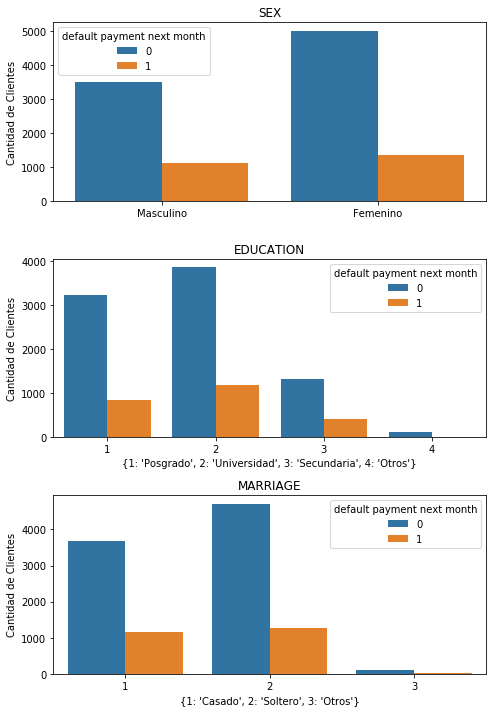

In [26]:
def graficoDataSet():  
  plt.clf()
  fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7,10))

  #if sns.__version__ >= '0.9.0':
  sns.countplot(x = 'SEX', hue='default payment next month', data=data, ax = axes[0])
  #plt.title('Distribución de Morosidad por Sexo del Cliente ')
  axes[0].set_title('SEX')
  axes[0].set_ylabel('Cantidad de Clientes')
  axes[0].set_xlabel('')
  axes[0].set_xticklabels(['Masculino', 'Femenino'])
  #plt.show()

  #if sns.__version__ >= '0.9.0':
  sns.countplot(x = 'EDUCATION', hue='default payment next month', data=data, ax = axes[1])
  #plt.title('Distribución de Morosidad por Educación ')
  axes[1].set_title('EDUCATION')
  axes[1].set_ylabel('Cantidad de Clientes')
  axes[1].set_xlabel(diccionario['EDUCATION'])
  #plt.show()

  #if sns.__version__ >= '0.9.0':
  sns.countplot(x = 'MARRIAGE', hue='default payment next month', data=data, ax = axes[2])
  #plt.title('Distribución de Morosidad por Estado Civil ')
  axes[2].set_title('MARRIAGE')
  axes[2].set_ylabel('Cantidad de Clientes')
  axes[2].set_xlabel(diccionario['MARRIAGE'])
  #plt.show()

  plt.tight_layout()
  plt.savefig('GraficoDataSet.png')

graficoDataSet()  

**Se puede apreciar que existen categorías las cuales no están descritas en el origen del DataSet (https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 
Estos casos serán incluidos com parte de la categoría Otros.**

In [22]:
data['EDUCATION'].replace({0:4, 5:4, 6:4}, inplace = True)
data['EDUCATION'].value_counts()

data['MARRIAGE'].replace({0:3}, inplace = True)
data['MARRIAGE'].value_counts()

2    5993
1    4834
3     149
Name: MARRIAGE, dtype: int64

<Figure size 432x288 with 0 Axes>

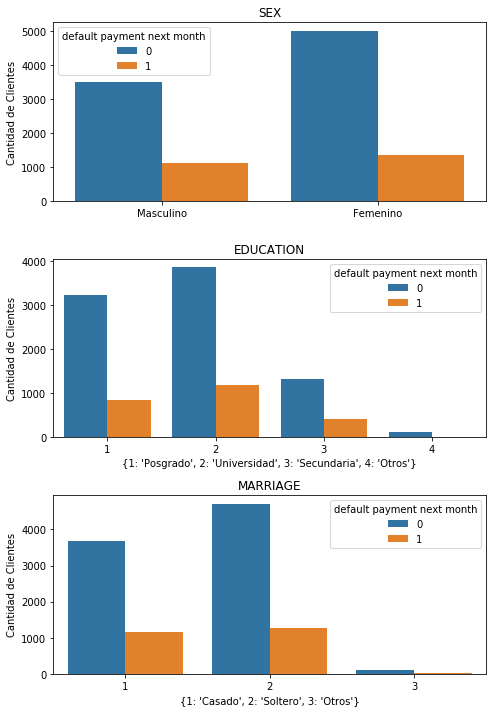

In [25]:
#Generamos el nuevo gráfico luego de modificar las variables categóricas.
graficoDataSet()

In [0]:
### Exportamos la data preprocesada
data.to_csv("CreditCardData_Processed.csv")

# Otros

In [0]:
plt.clf()
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Creates four polar axes, and accesses them through the returned array
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Creates figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax=plt.subplots(num=10, clear=True)

In [0]:
cat_vars = [c for c in data if not pd.api.types.is_numeric_dtype(data[c])]
cat_vars

[]

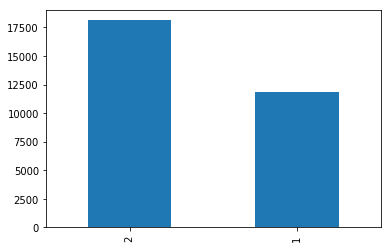

In [0]:
#Transformando variables a categóricas
data['SEX'].astype('category', inplace = True)
data["SEX"].value_counts().plot(kind = 'bar')

In [0]:
var = ["SEX", "EDUCATION", "MARRIAGE", "AGE", "default payment next month"]
data[var].describe()

data.groupby("default payment next month").count()/len(data)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,,,,,,,,,,,,,,,,,,,
0,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788,0.7788
1,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212,0.2212


Text(0.5, 0.98, 'Categorical Plotting')

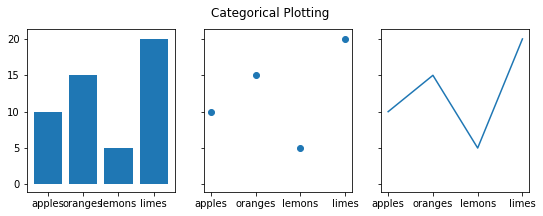

In [0]:

import matplotlib.pyplot as plt

data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
data["SEX"].value_counts().plot(kind = 'bar')
fig.suptitle('Categorical Plotting')

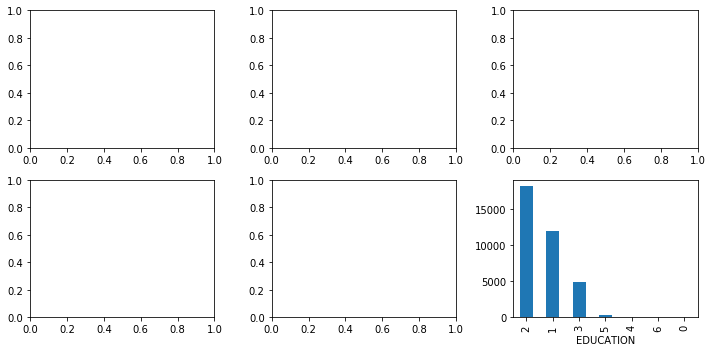

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,5))

axes[0,0] = data["SEX"].value_counts().plot(kind = 'bar').set_xlabel("SEX")
axes[0,1] = data["EDUCATION"].value_counts().plot(kind = 'bar').set_xlabel("EDUCATION")

plt.tight_layout()

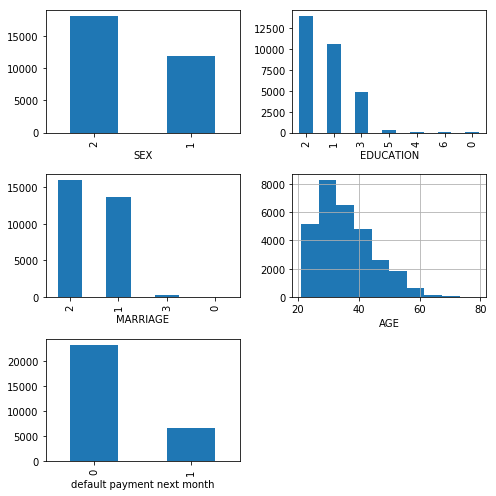

In [0]:
#Gráficos Estadísticos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7,7))
cols = ["SEX", "EDUCATION", "MARRIAGE", "AGE", "default payment next month"]
#axes[0,0] = data["SEX"].hist()
for c,ax in zip(data[cols], axes.flatten()):
  if c in ["AGE"]:
    p = data[c].hist(ax=ax)
    p.set_xlabel(c)
  else:
    p = data[c].value_counts().plot(kind = 'bar', ax = ax)
    p.set_xlabel(c)
axes[2,1].remove()
plt.tight_layout()

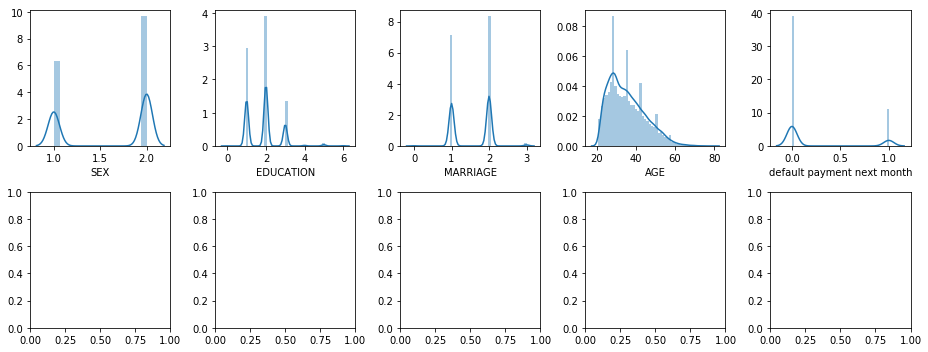

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(13,5))

for c,ax in zip(data[cols], axes.flatten()):
    sns.distplot(data[c], ax=ax)
    
plt.tight_layout()

In [0]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default payment nex month']

TypeError: ignored

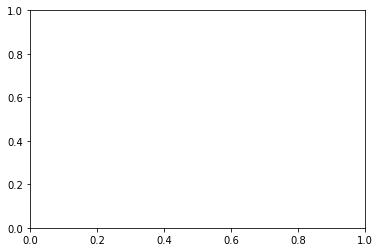

In [0]:
g = sns.barplot(x="SEX", y = "EDUCATION", data=data,
                height=6, kind="bar", palette="muted")
#g.despine(left=True)
g.set_ylabels("survival probability")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc088fbd780>,
      dtype=object)

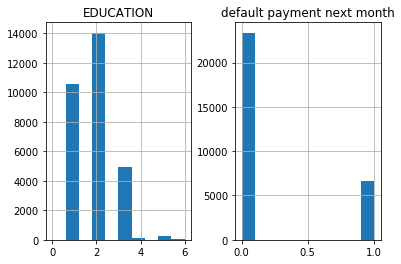

In [0]:
data[['EDUCATION', 'default payment next month']].hist()